In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# LEAVES OF THE MURUNGA TREE

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Kalamunggay_%28Moringa_oleifera%29%2C_Philippines.jpg/1024px-Kalamunggay_%28Moringa_oleifera%29%2C_Philippines.jpg" />

<img src="https://supportvectors.com/wp-content/uploads/2022/03/kayal_square-400x400.jpg" width="250" align="left"/>

*This project is submitted by Kayalvizhi Thirumavalavan, a data scientist at SupportVectors, who is also part of the teaching faculty for this workshop.*

https://www.linkedin.com/in/kayalvizhi1996/

## Number of leaflets in a Compound leaf - Moringa Oleifera (Murunga tree)

My mother planted The murunga tree at my house two years ago and I have been watching it grow with much fascination. Today it is a full grown tree and we have harvested drumsticks 3 times already! The growth of this tree is extremely fast almost exponential! The geometry of it's compound leaf is the item of study for this project. 

I collected around 20 compound leaves as shown in the figure below. 

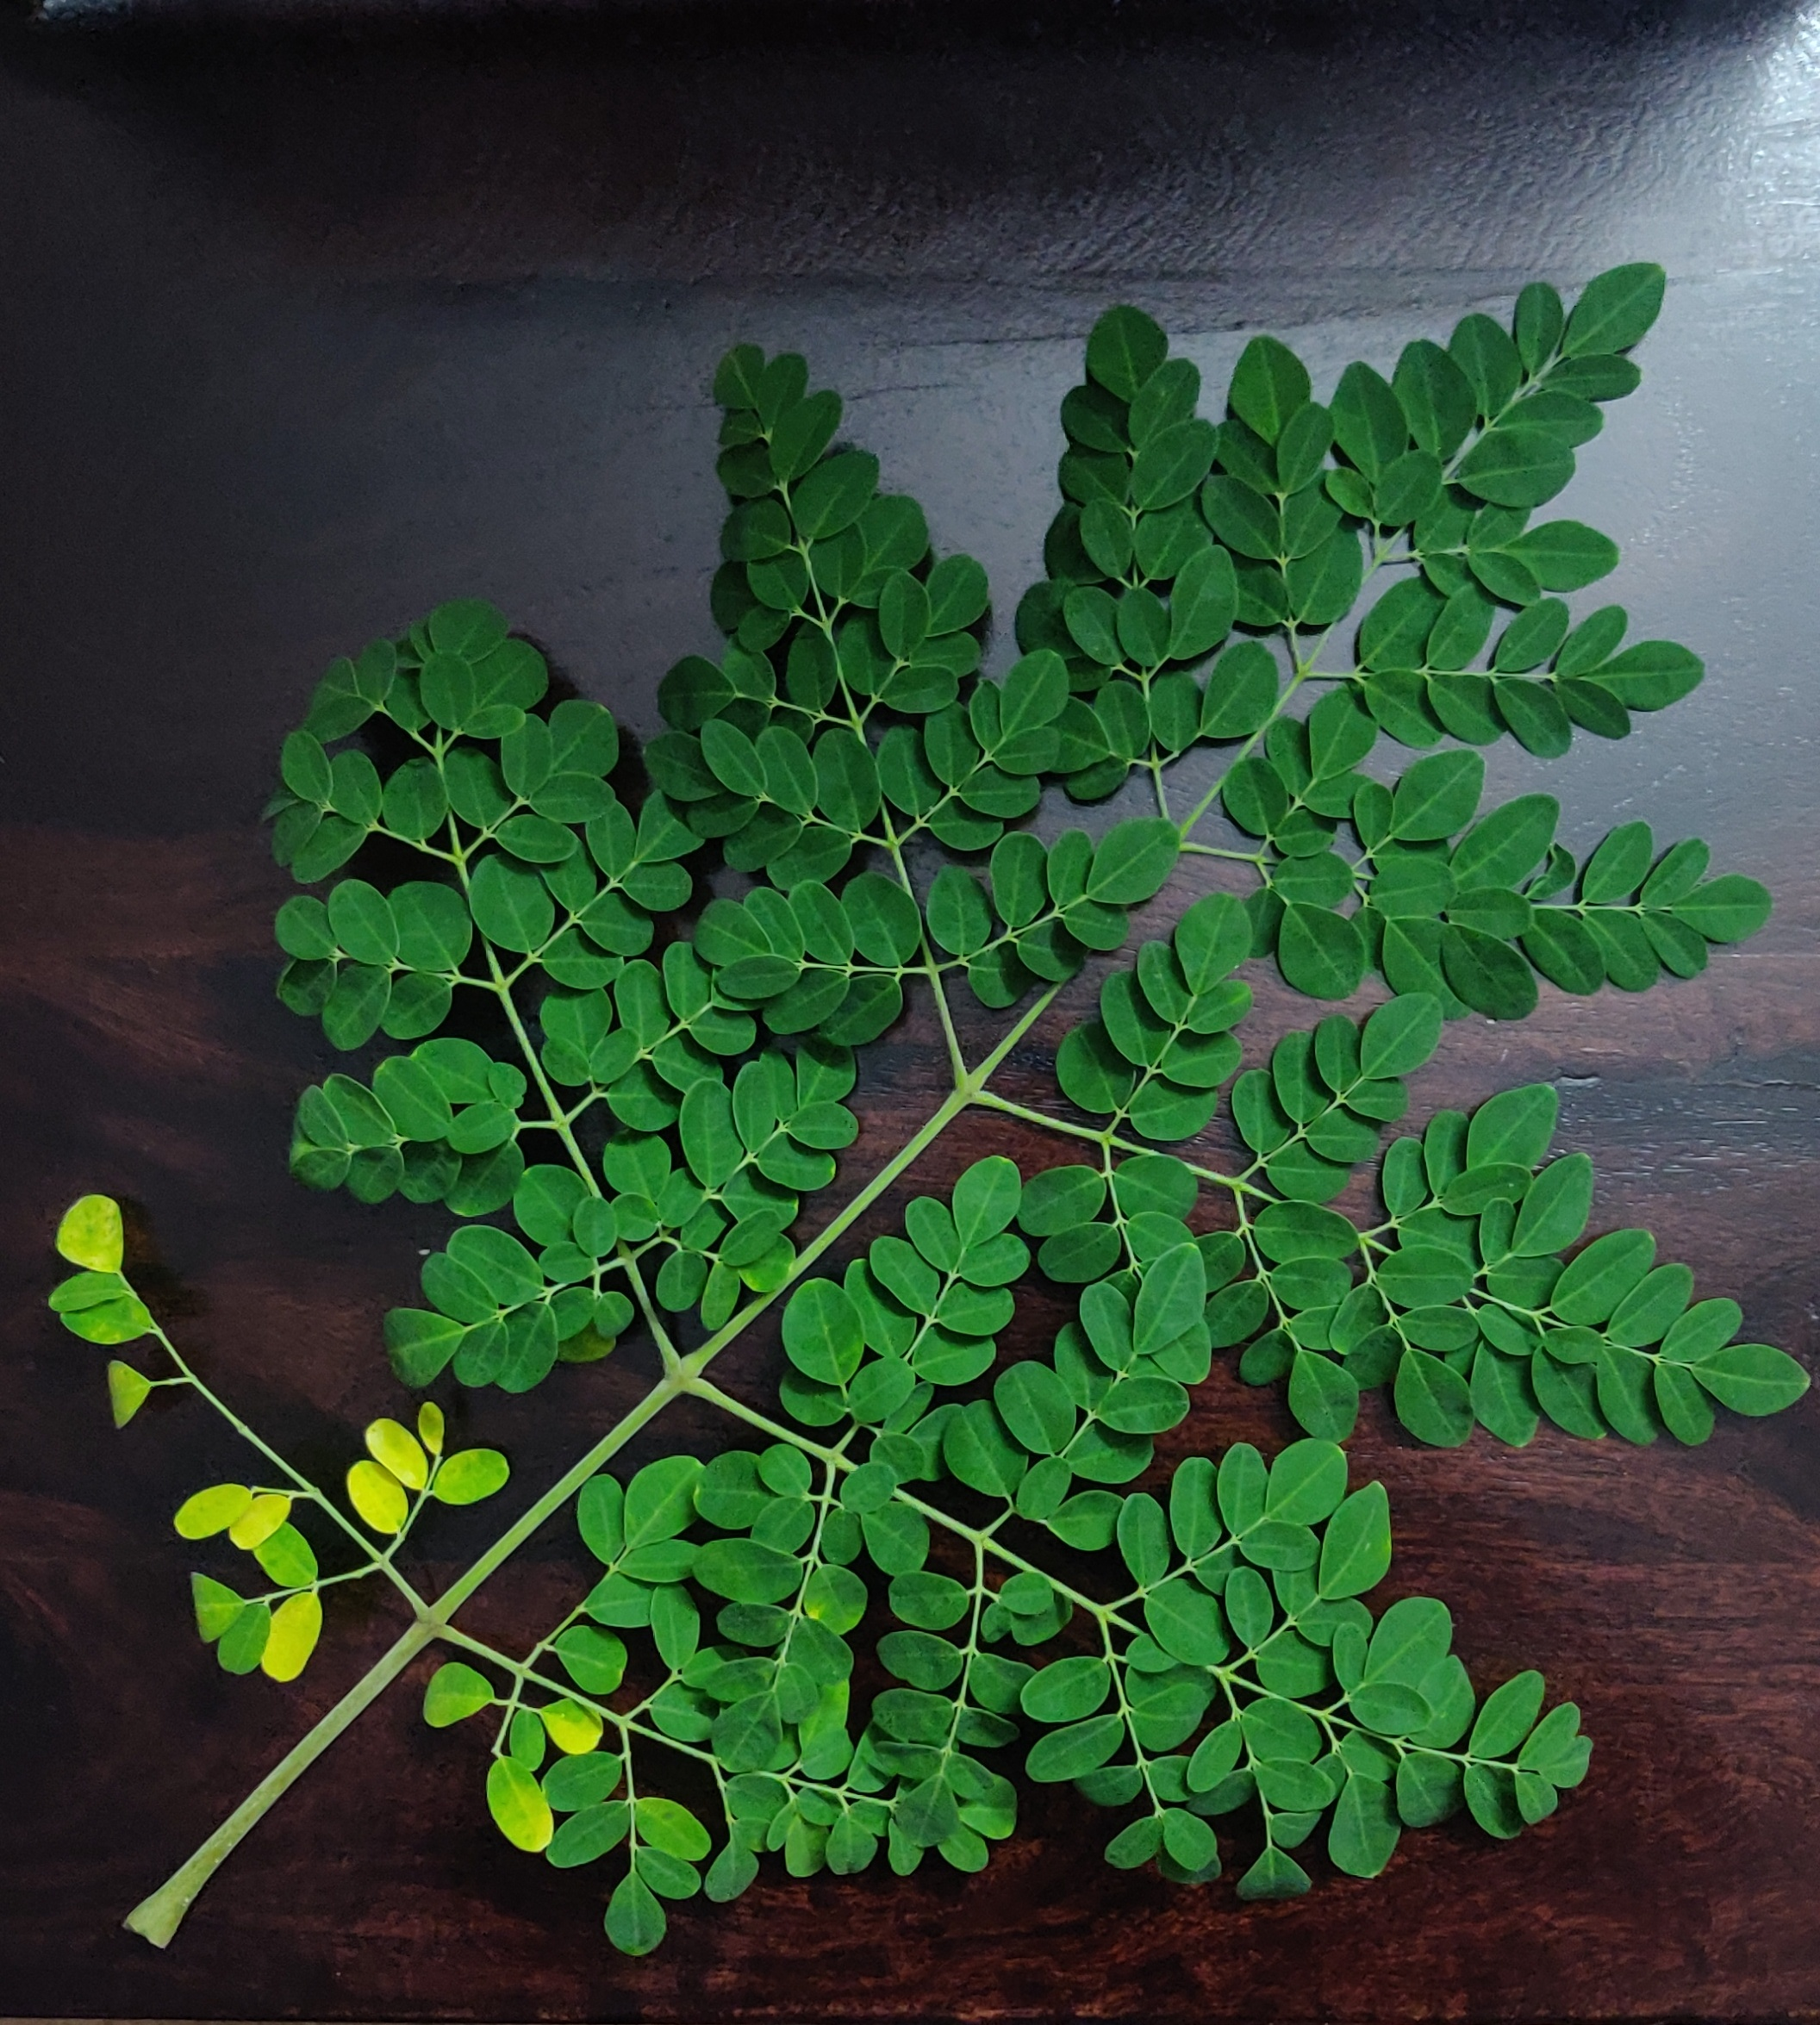

## Objective
At first glace. there seems to be a pattern in the arrangement of the leaflets. Its a tripinnate compund leaf. 

For this exercise I decided to study the relationship between the length of the petiole(the subbranch) and the number of leaflets it holds.

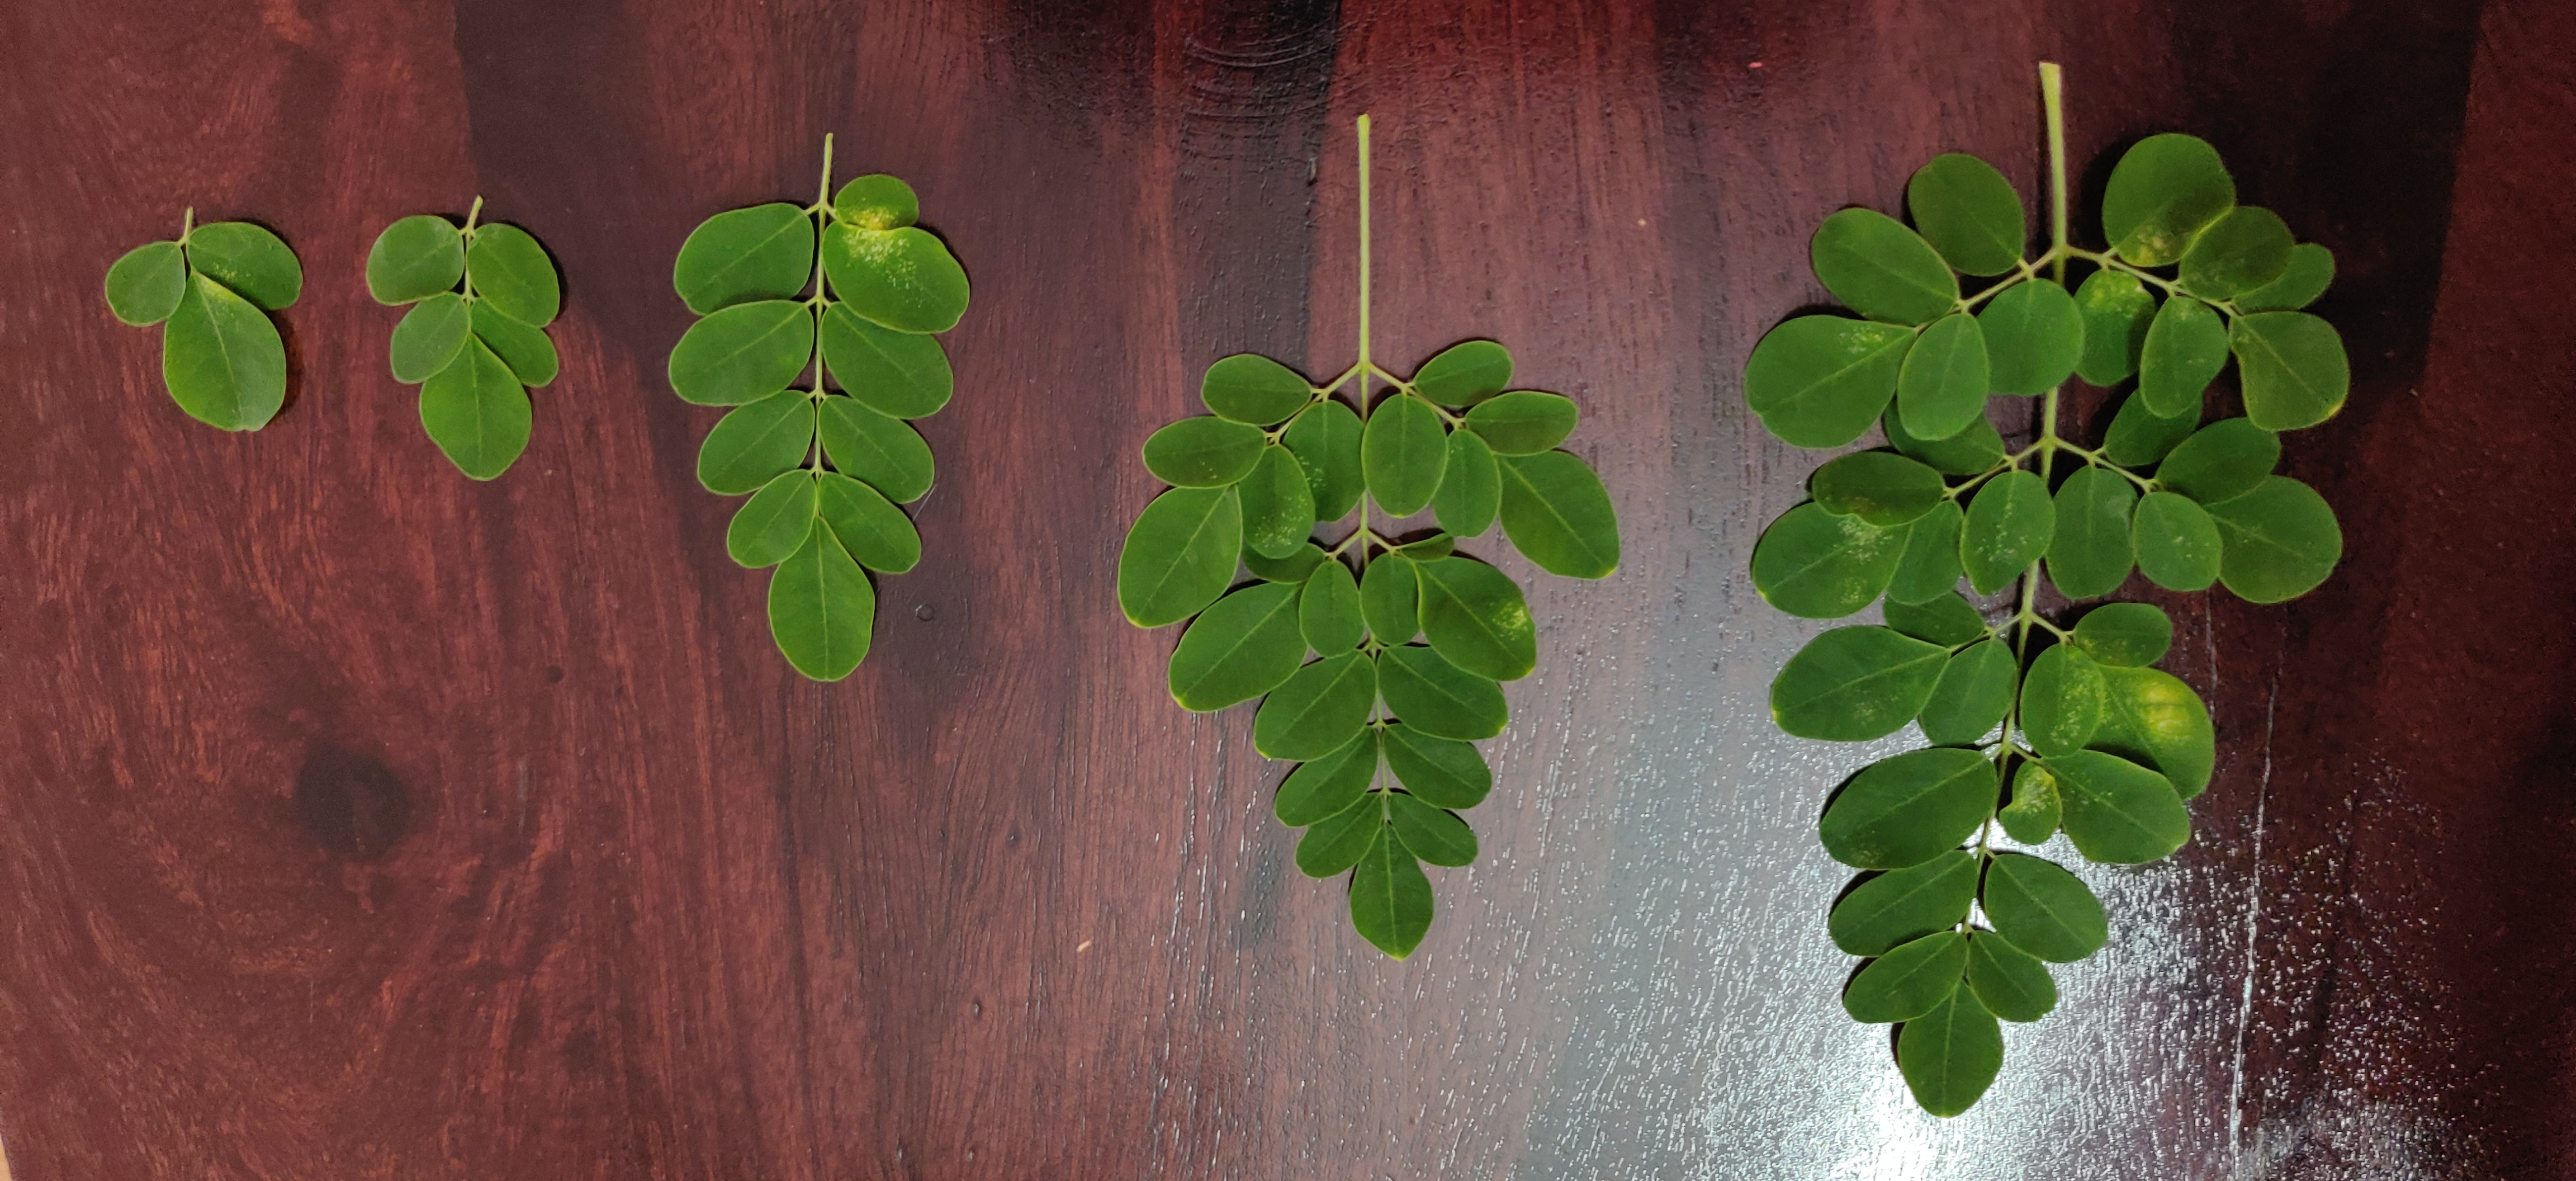

In [2]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



In [3]:
# Starting with the standard imports
import numpy as np
import pandas as pd
import pandas_profiling

In [4]:
# import data
source = "https://raw.githubusercontent.com/supportvectors/ml-100/master/murunga.csv"
data = pd.read_csv(source)

In [5]:
data = data.set_index("index")

In [6]:
data.head()

petiole  leaflet count
index                        
1          3.5              7
2          2.5              5
3          4.0              9
4          4.0              7
5          2.9              7

In [7]:
data.tail()

petiole  leaflet count
index                        
205        9.4             17
206       15.0             45
207       15.5             51
208       10.7             31
209       11.3             35

A sample of the dataset:

In [8]:
data.sample(10)

petiole  leaflet count
index                        
31         0.7              3
172       10.1             22
85         2.2              5
199        9.3             24
61         2.2              5
156        5.0              7
46         3.9              6
182       16.3             50
10         9.5             34
196       15.3             61

In [9]:
data.describe().transpose()

count       mean        std  min  25%  50%   75%   max
petiole        209.0   5.340431   4.977428  0.2  1.1  3.3   8.8  18.3
leaflet count  209.0  15.071770  17.935237  1.0  3.0  7.0  22.0  88.0

In [10]:
data.isnull().sum()

petiole          0
leaflet count    0
dtype: int64

### Scatterplot

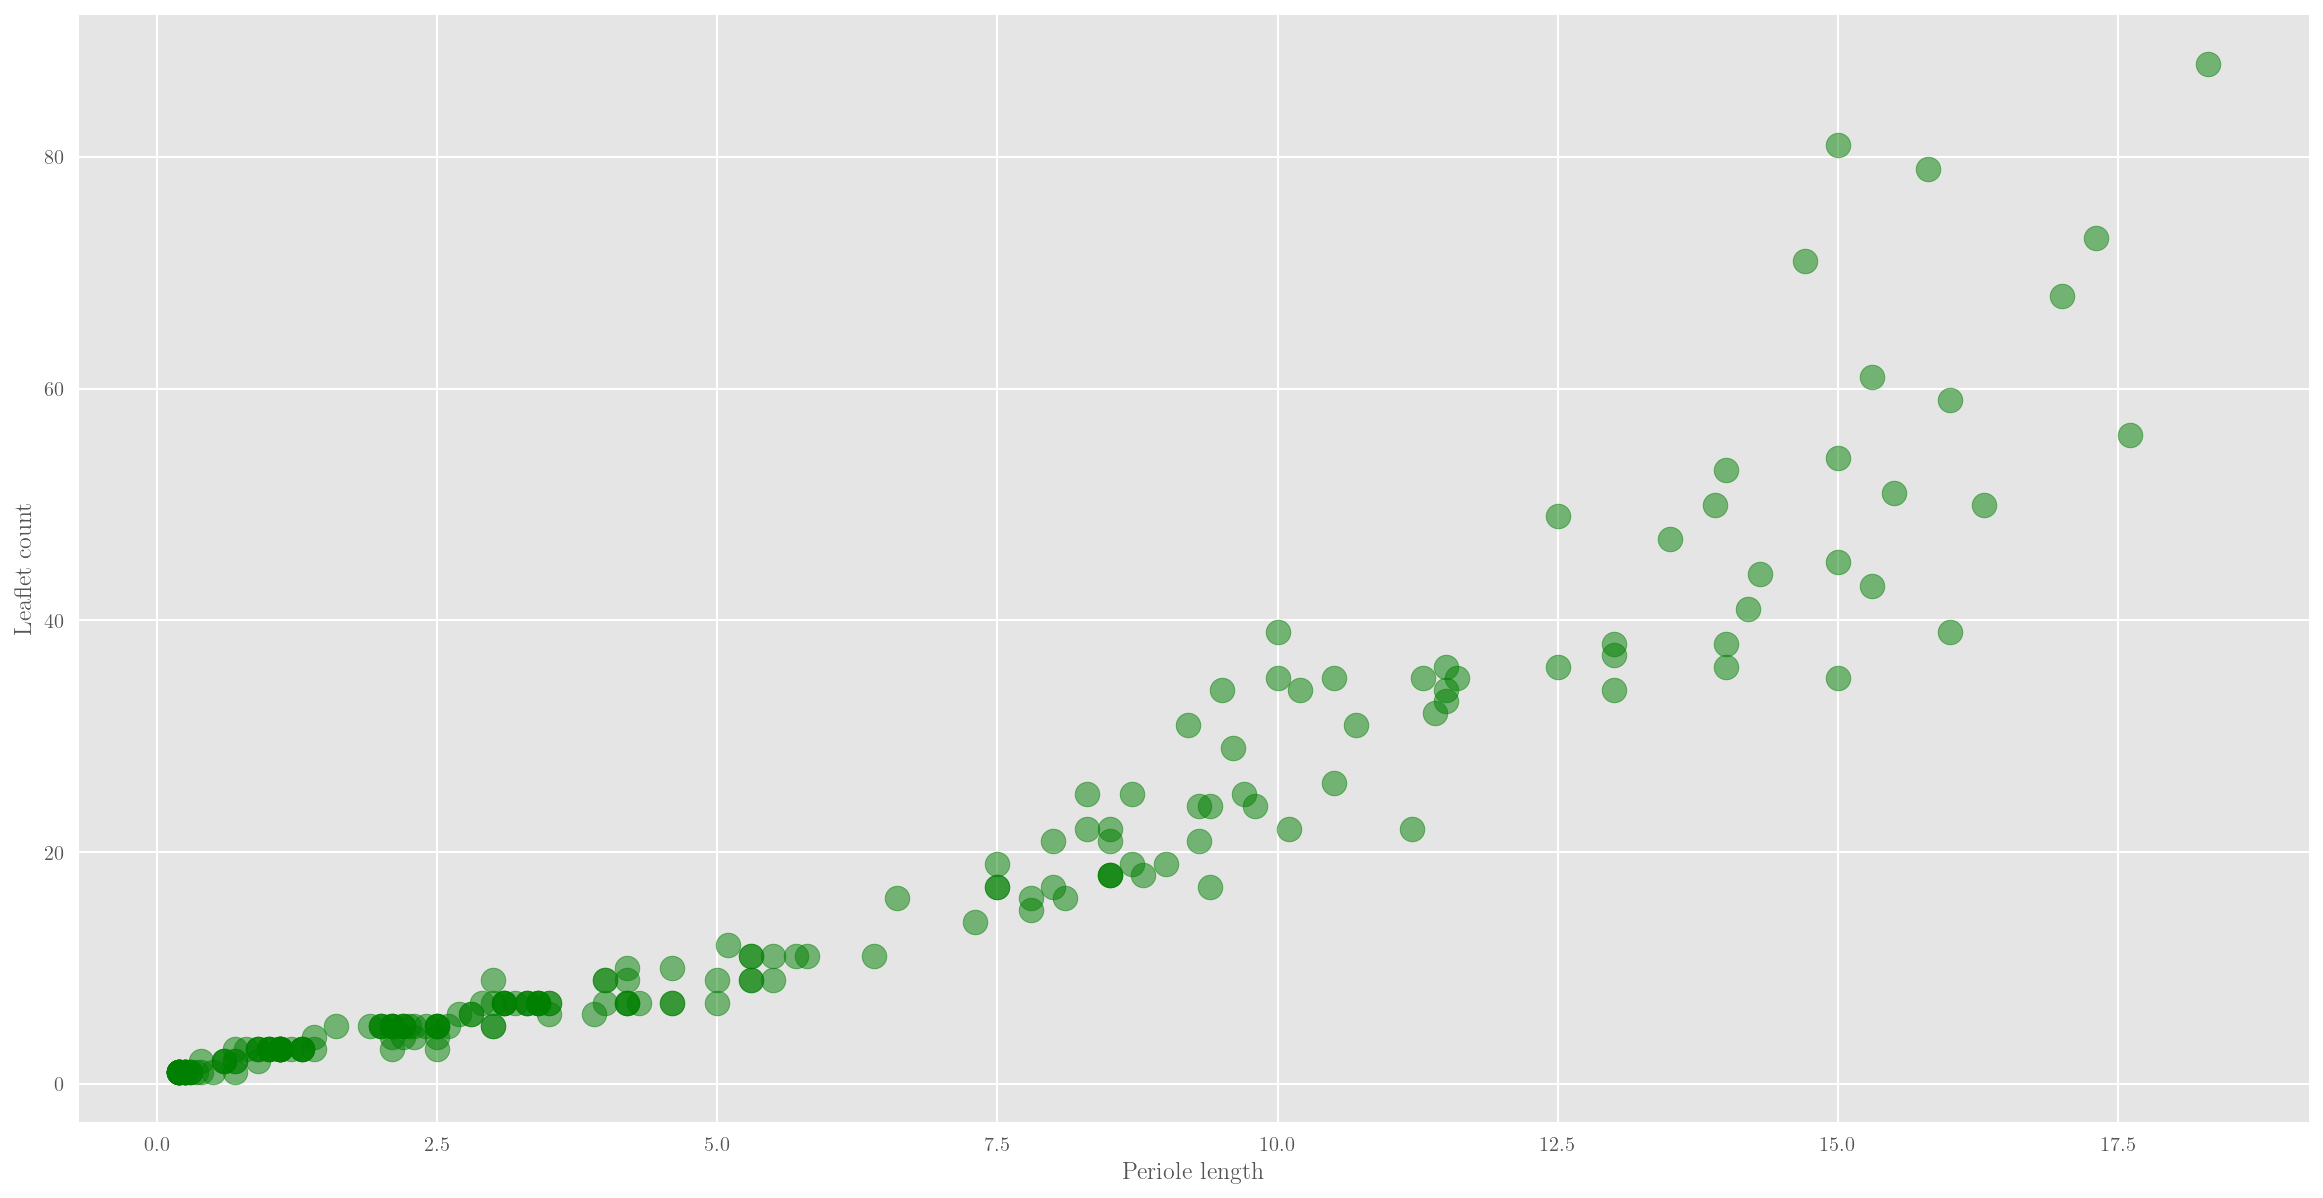

In [11]:
x1 = "petiole"
y1 = "leaflet count"
plt.scatter(data[x1], data[y1], s=150, color="green", alpha=0.5);
plt.xlabel(r"Periole length");
plt.ylabel(r"Leaflet count");

## Observations

The plot shows that the leaflet count seem to grow exponentially with increase in the petiole length. But also there seems to be some heteroscedasticity. There is more noise as we increase the petiole length


array([[<AxesSubplot: title={'center': 'petiole'}>,
        <AxesSubplot: title={'center': 'leaflet count'}>]], dtype=object)

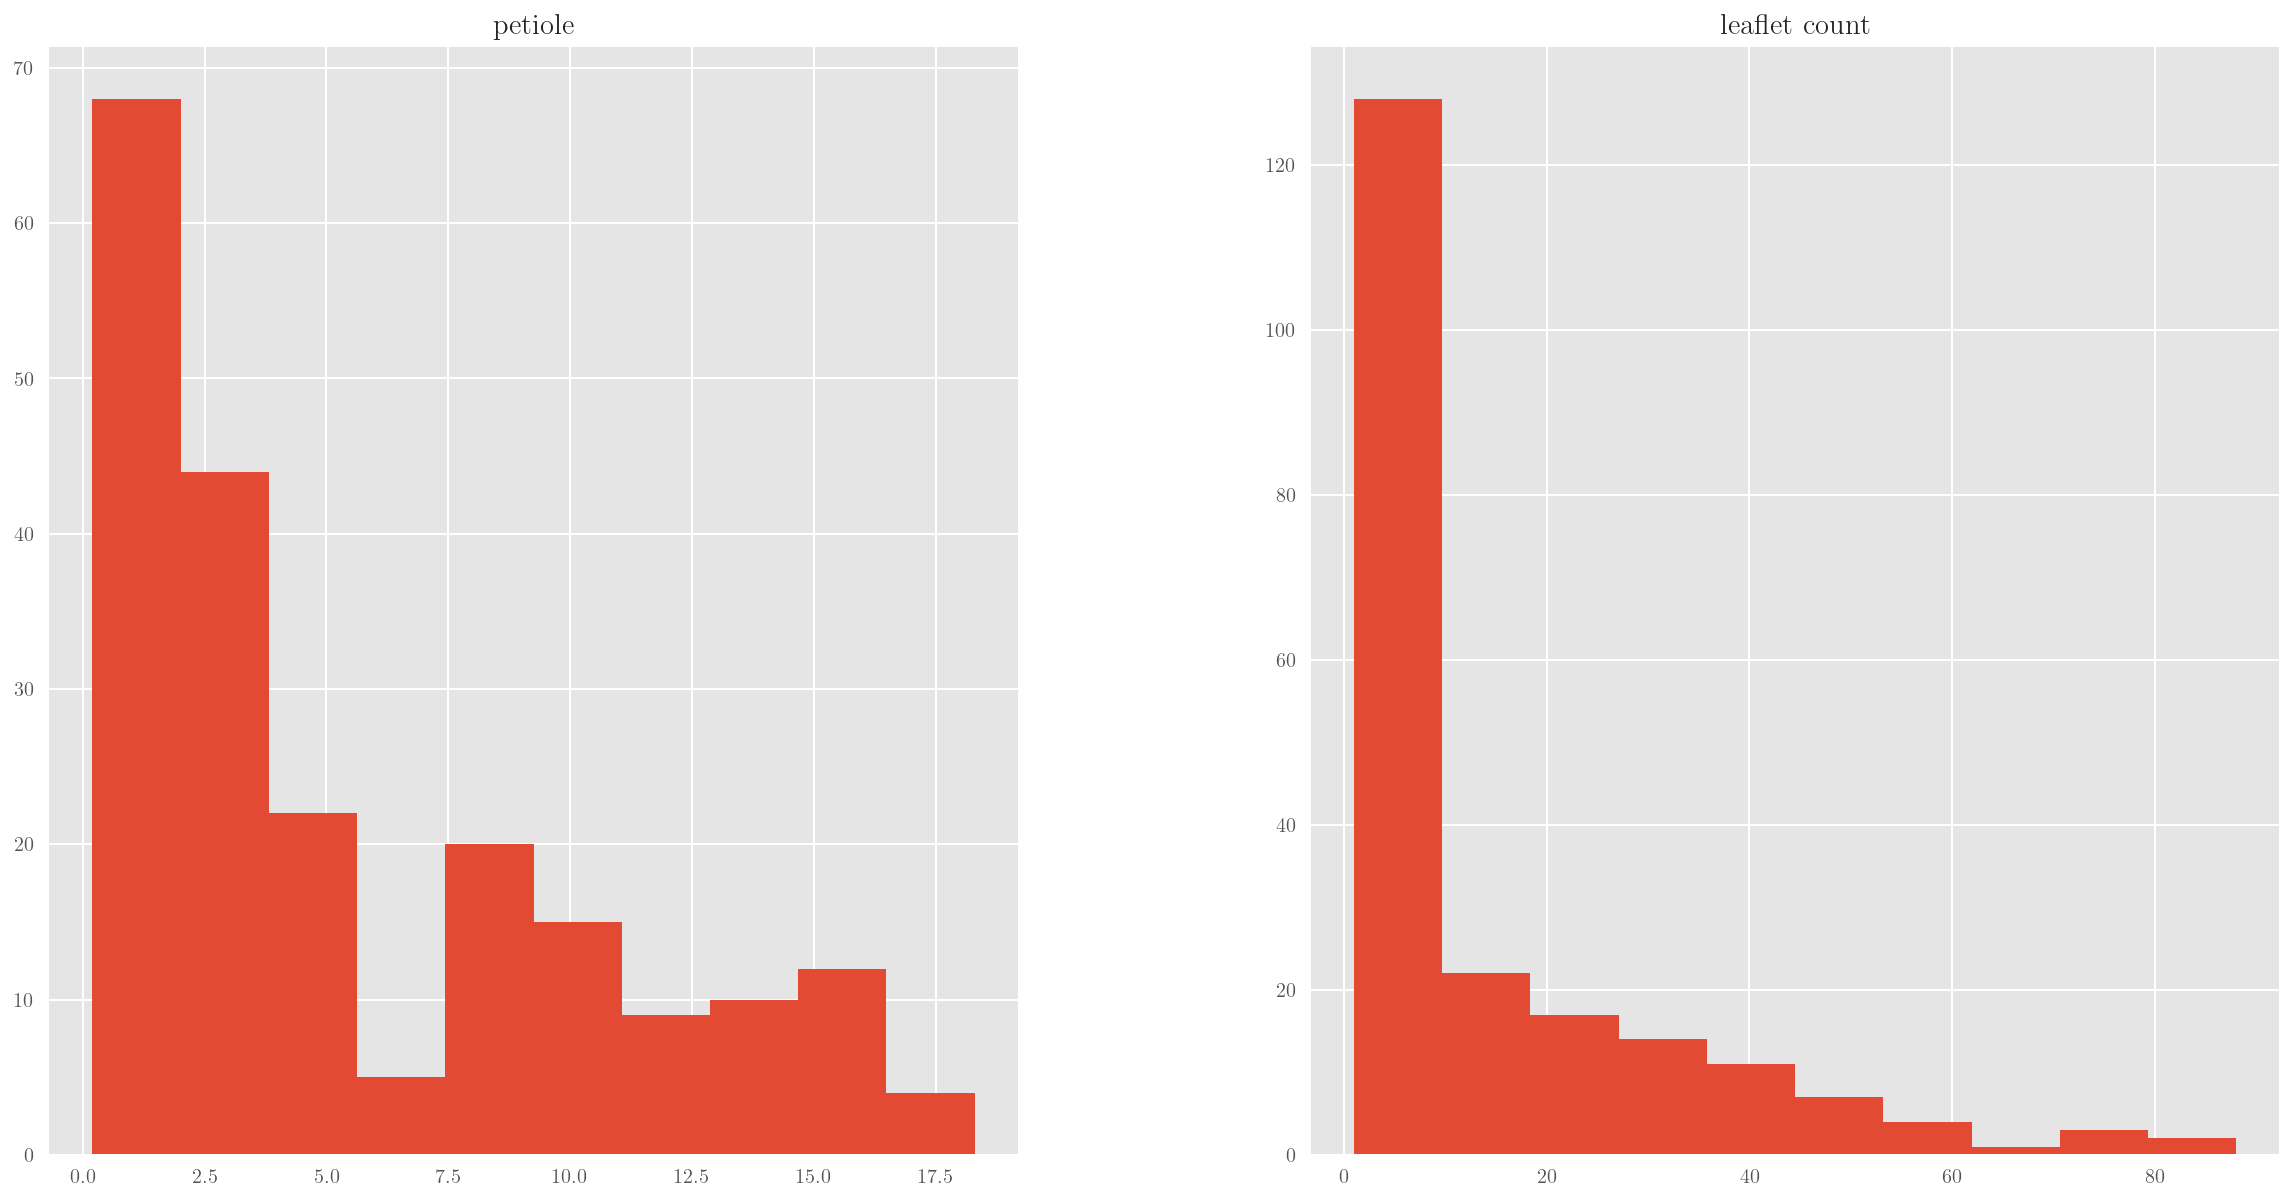

In [12]:
data.hist()

## Preprocessing

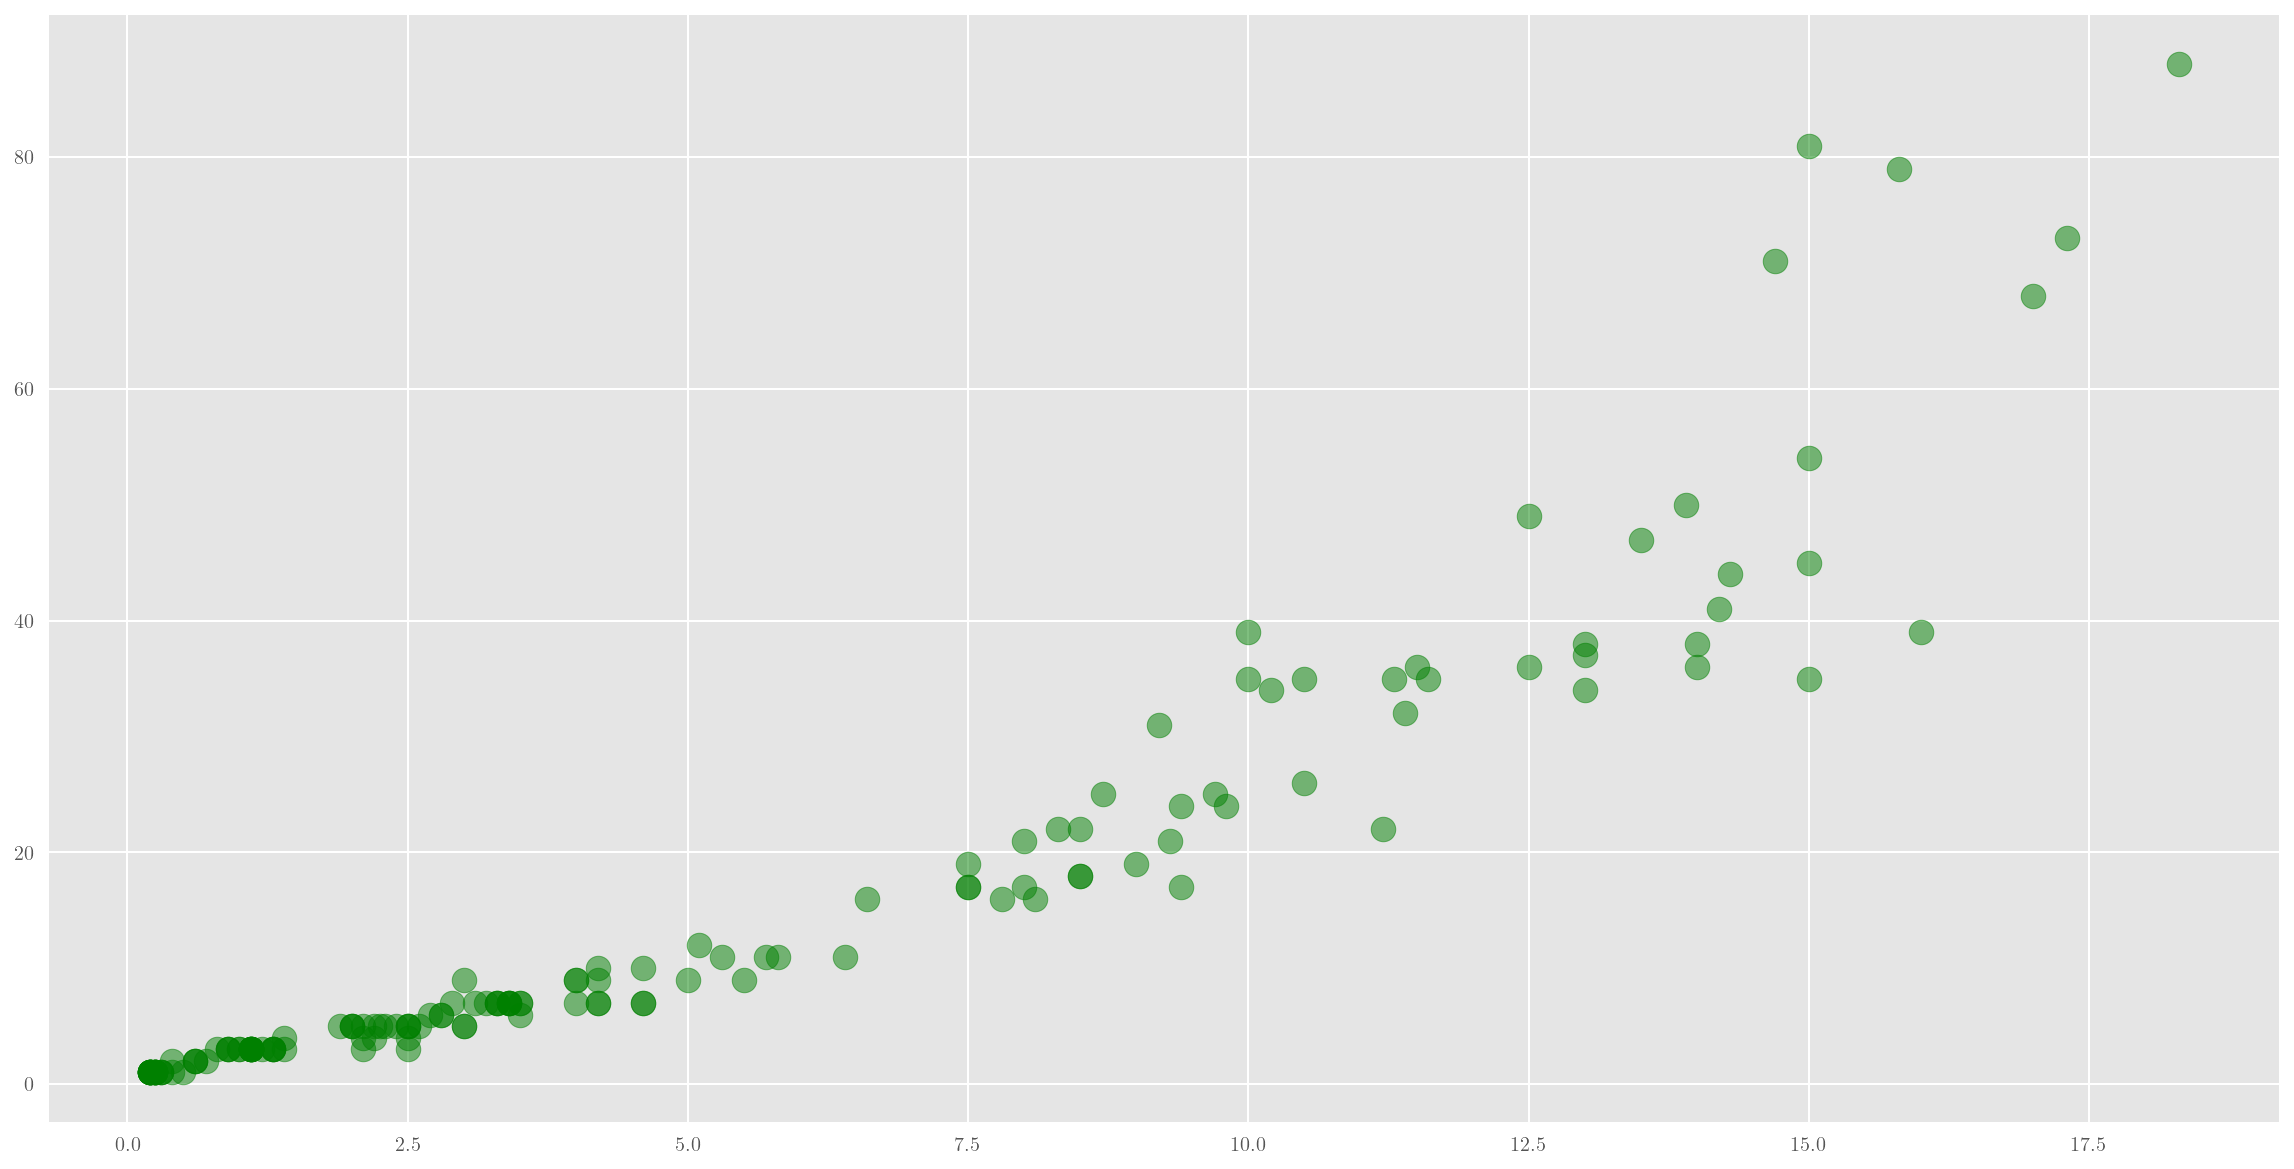

In [13]:
X = data[[x1]]
y = data[y1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# scaler = StandardScaler()                    
# scaler.fit(X_train)   # Compute the mean and std to be used for later scaling.
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

plt.scatter(X_train, y_train, alpha=0.5, s = 150, color = "green");


## Linear regression model

In [14]:
model = LinearRegression();
model.fit(X_train, y_train);
print(model.intercept_, model.coef_)

-3.008015186497566 [3.44035309]


In [15]:
yhat = model.predict(X_test)
print("mean squared error: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

mean squared error:  22.34240861170367
r2:  0.9244440120987725


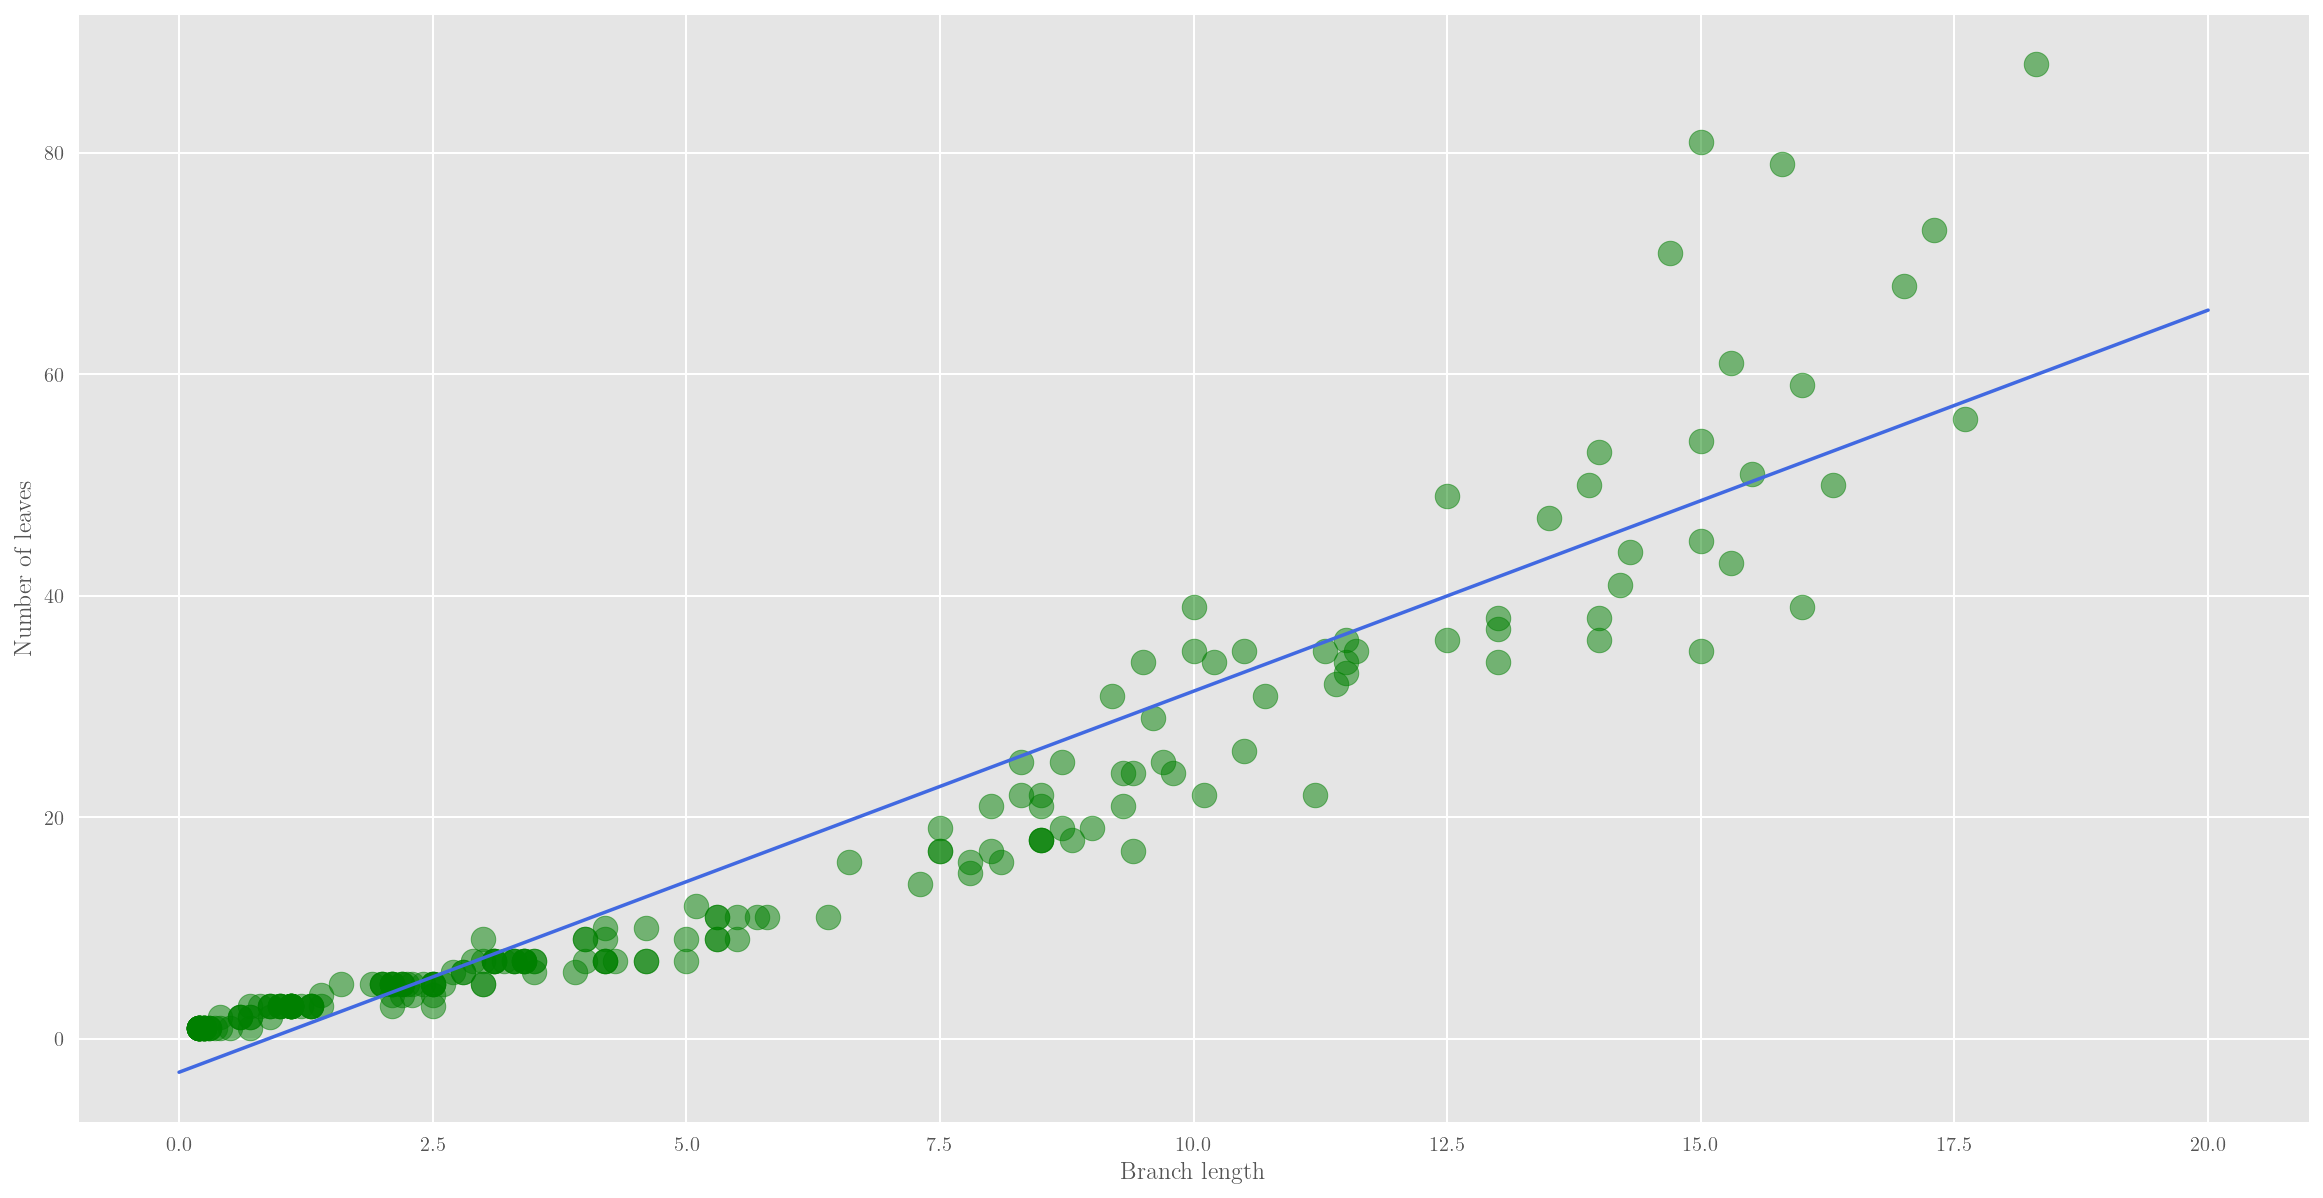

In [16]:
plt.scatter(data[x1], data[y1], s=150, color="green", alpha=0.5);
X = np.linspace(0, 20, 1000)
XX = X[:, np.newaxis]
y = model.predict(XX)
plt.plot(XX, y, color="royalblue")
plt.xlabel(r"Branch length");
plt.ylabel(r"Number of leaves");


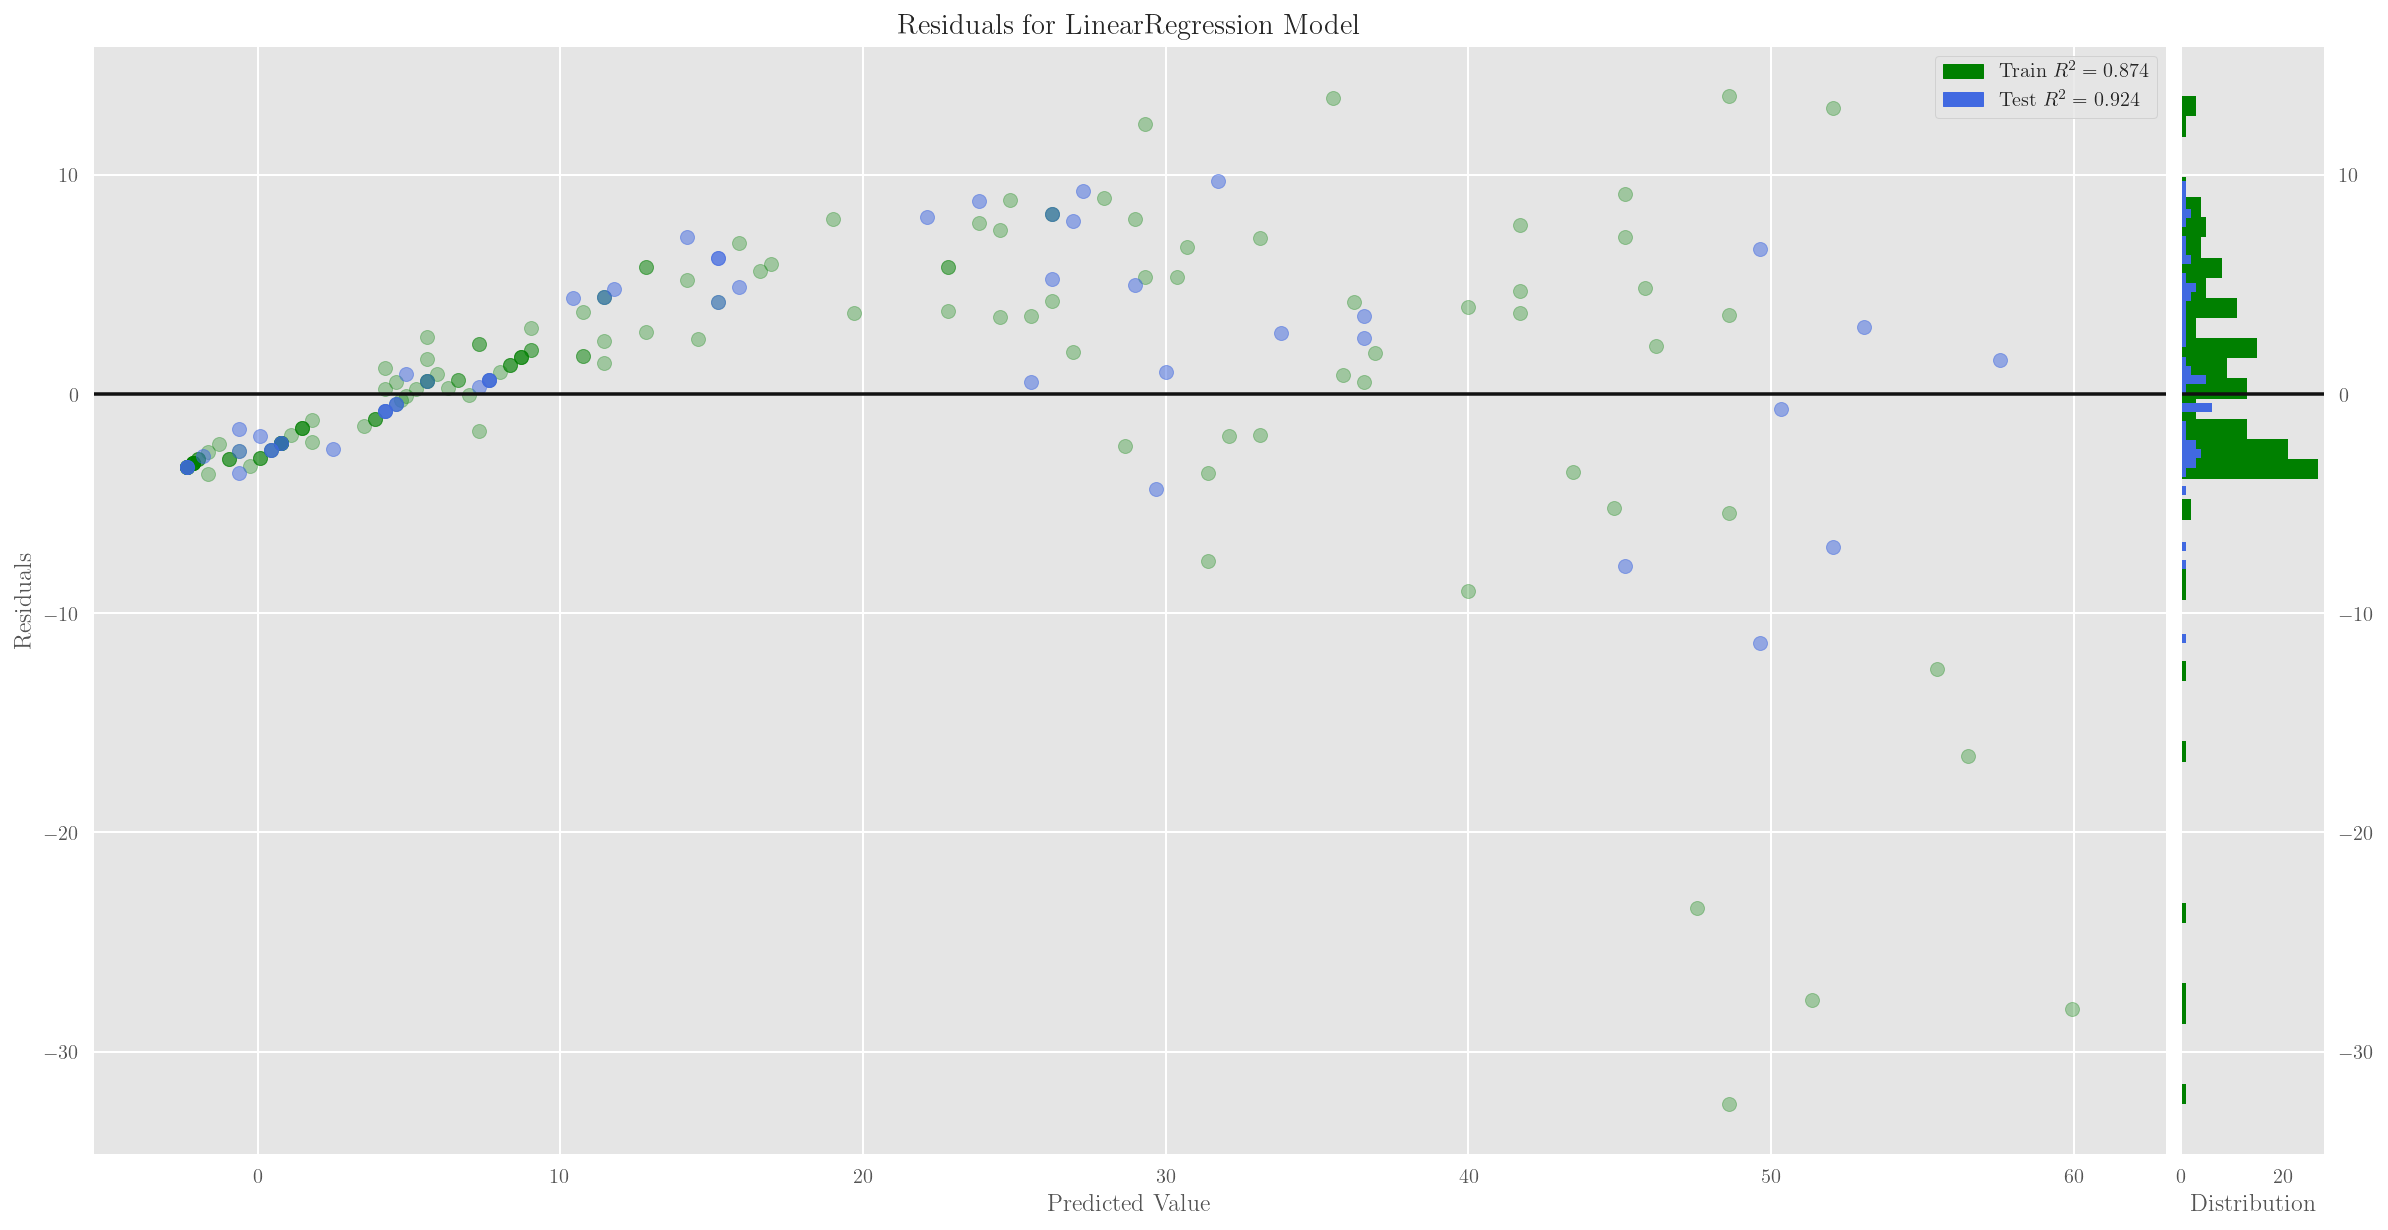

In [17]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='green', test_color='royalblue', train_alpha=0.3, test_alpha=0.5)


## Observation

The distribution of the residuals is skewed. 
There seems to bias error and the thus the model is oversimplistic compared to the ground truth.
There alse seems to be some heteroscedasticity.

The linear model fails to capture the relationship between the variables well.

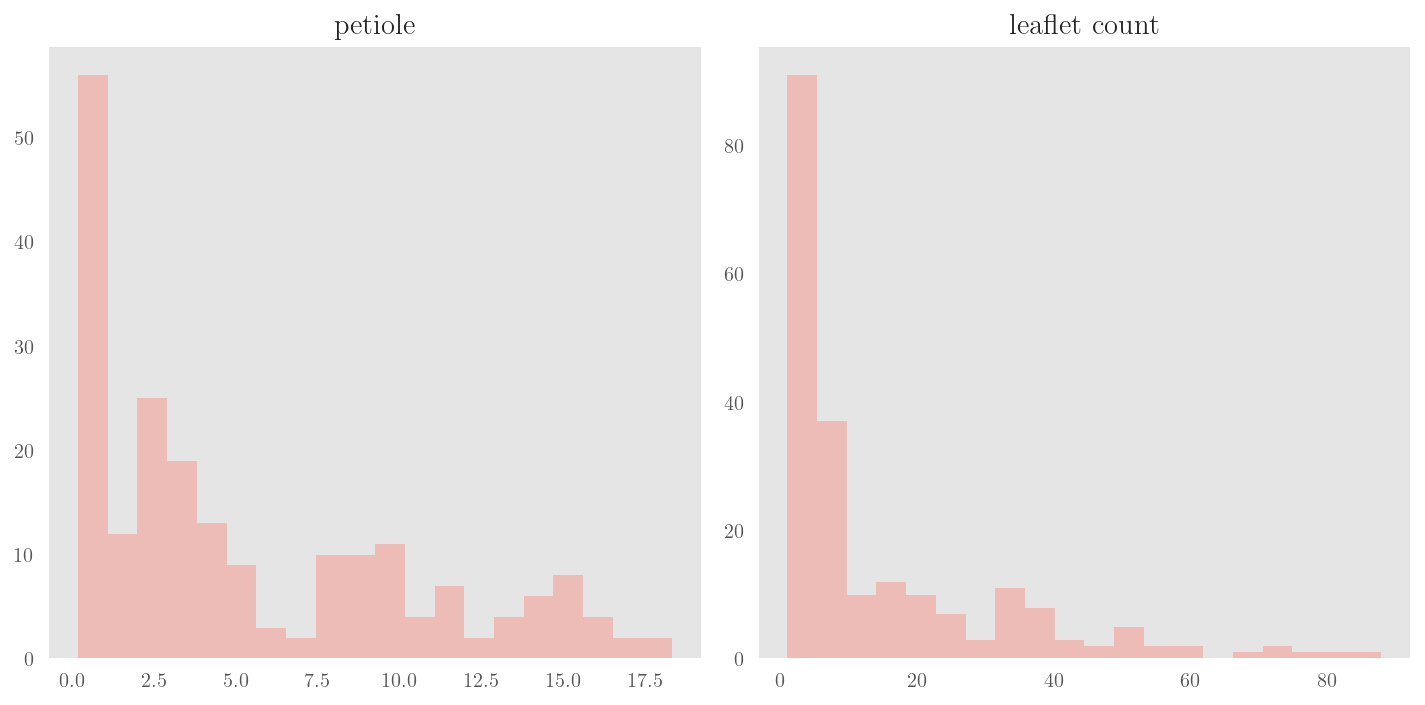

In [18]:
data.hist(bins=20, alpha=0.4, grid=False, color='salmon', figsize=(10,5))
plt.tight_layout();

## Non linear regression

The scatter plot resembles an exponential function, therefore here I try to fit an exponential function to the data. 

In [19]:
import math
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t


X = data[x1].astype(float)
y = data[y1].astype(float)

def natural(x, a, b, c):
    return a * np.exp(b * x) + c

initial_guess = [1, 1, 1]
pars, pcov = curve_fit(natural, X, y, p0=initial_guess)
print("a: " , pars[0])
print("b: " , pars[1])
print("c: " , pars[1])

a:  16.11493010111403
b:  0.09549269763238294
c:  0.09549269763238294


In [20]:
print(pcov)

[[ 7.08131361e+00 -2.15989763e-02 -8.05597510e+00]
 [-2.15989763e-02  6.67602863e-05  2.43550285e-02]
 [-8.05597510e+00  2.43550285e-02  9.32535680e+00]]


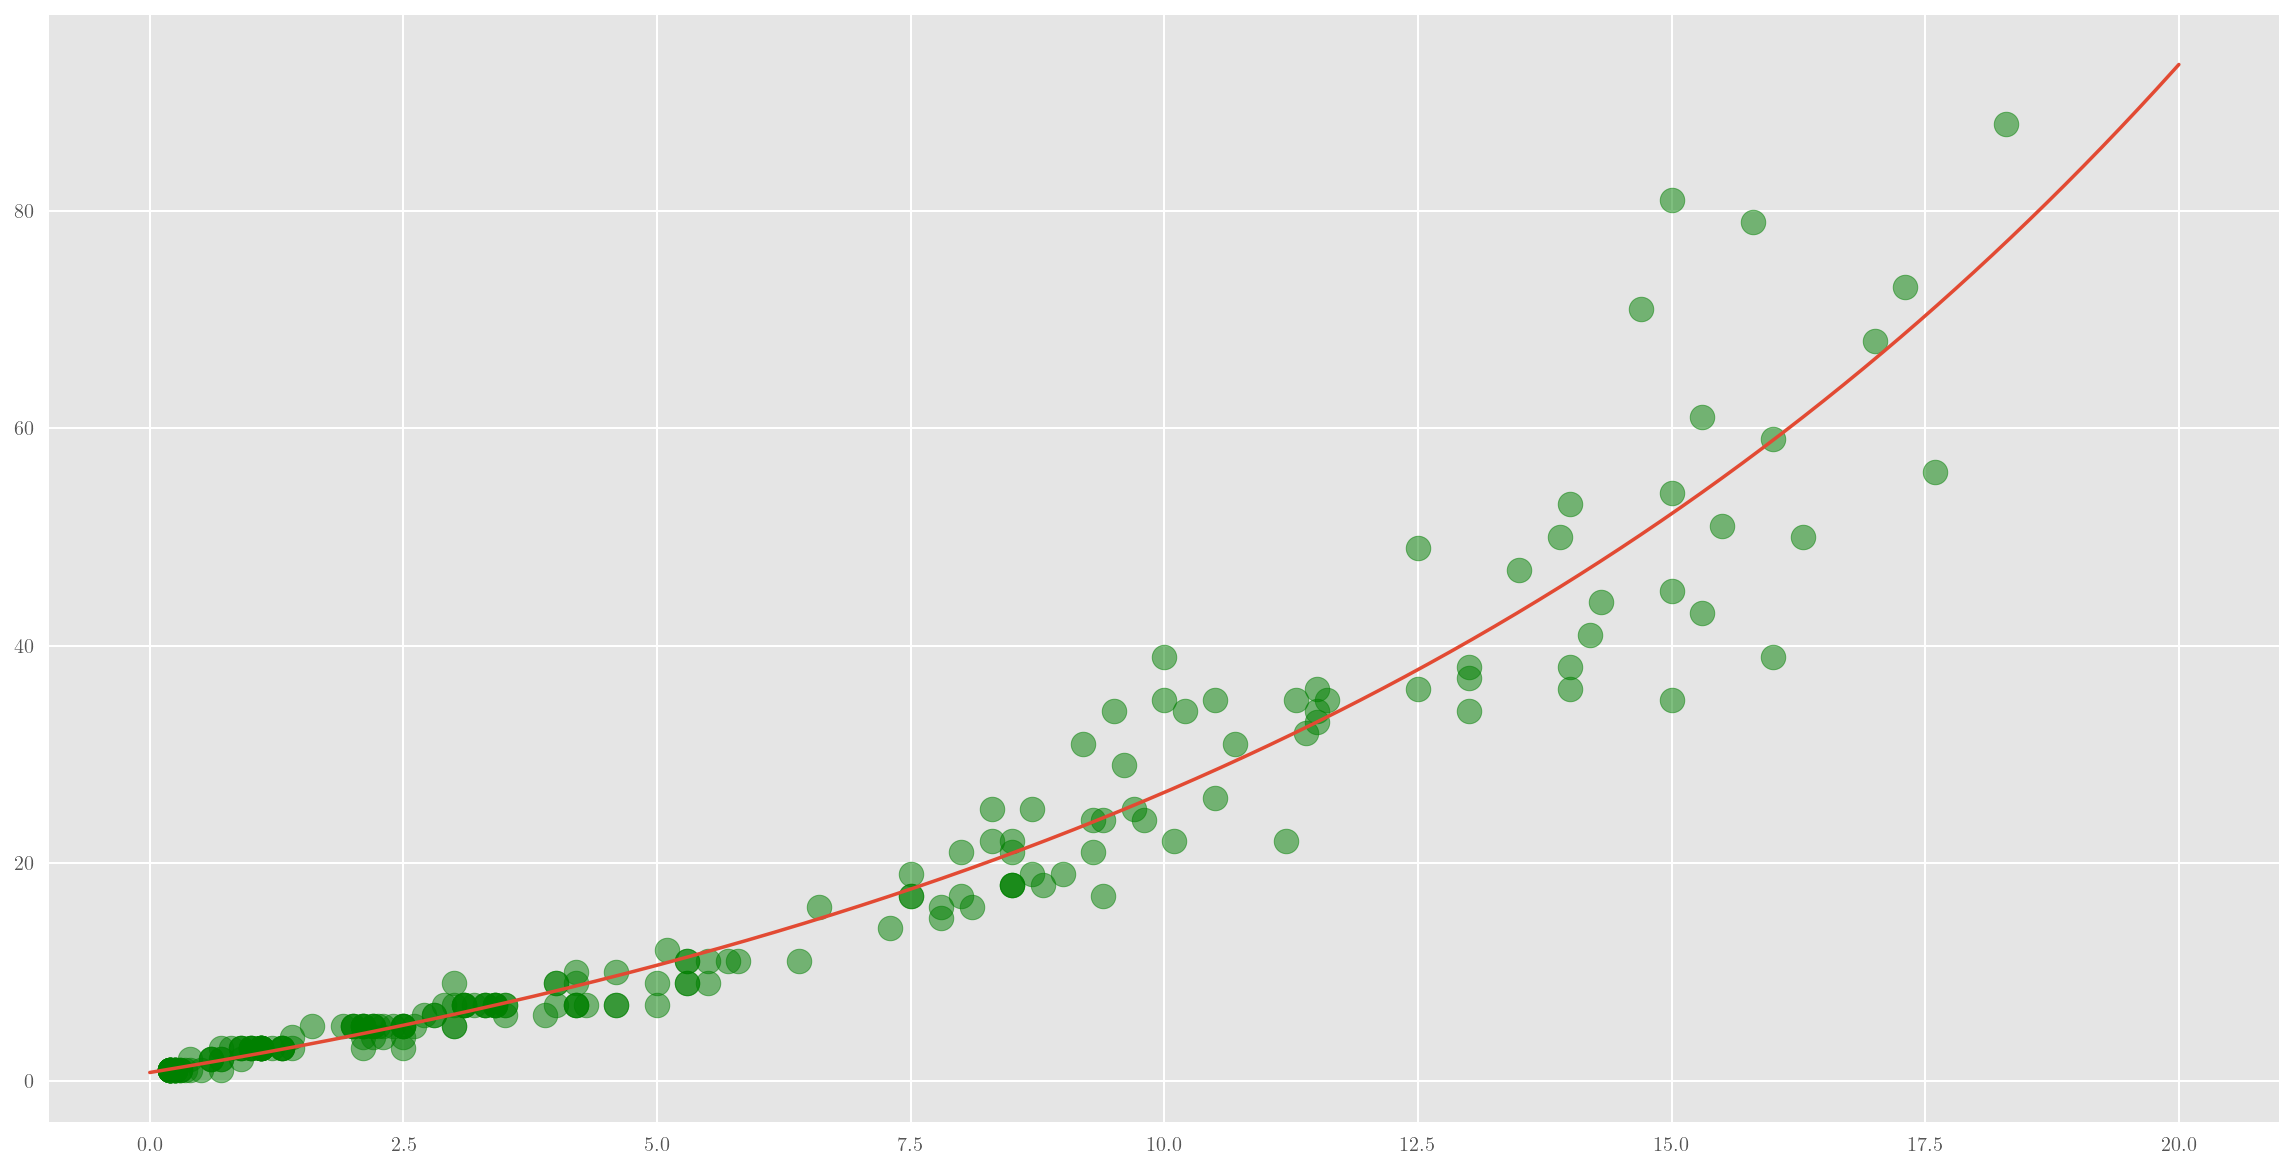

In [21]:
plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
plt.rcParams['figure.dpi'] = 144                         # high-dpi monitors support
plt.style.use ('ggplot')

plt.scatter(data[x1], data[y1], s=150, color="green", alpha=0.5);
X = np.linspace(0, 20, 1000)
yfit = natural(X, pars[0], pars[1], pars[2])
plt.plot(X, yfit);


## Observation

The model seems to be robust 

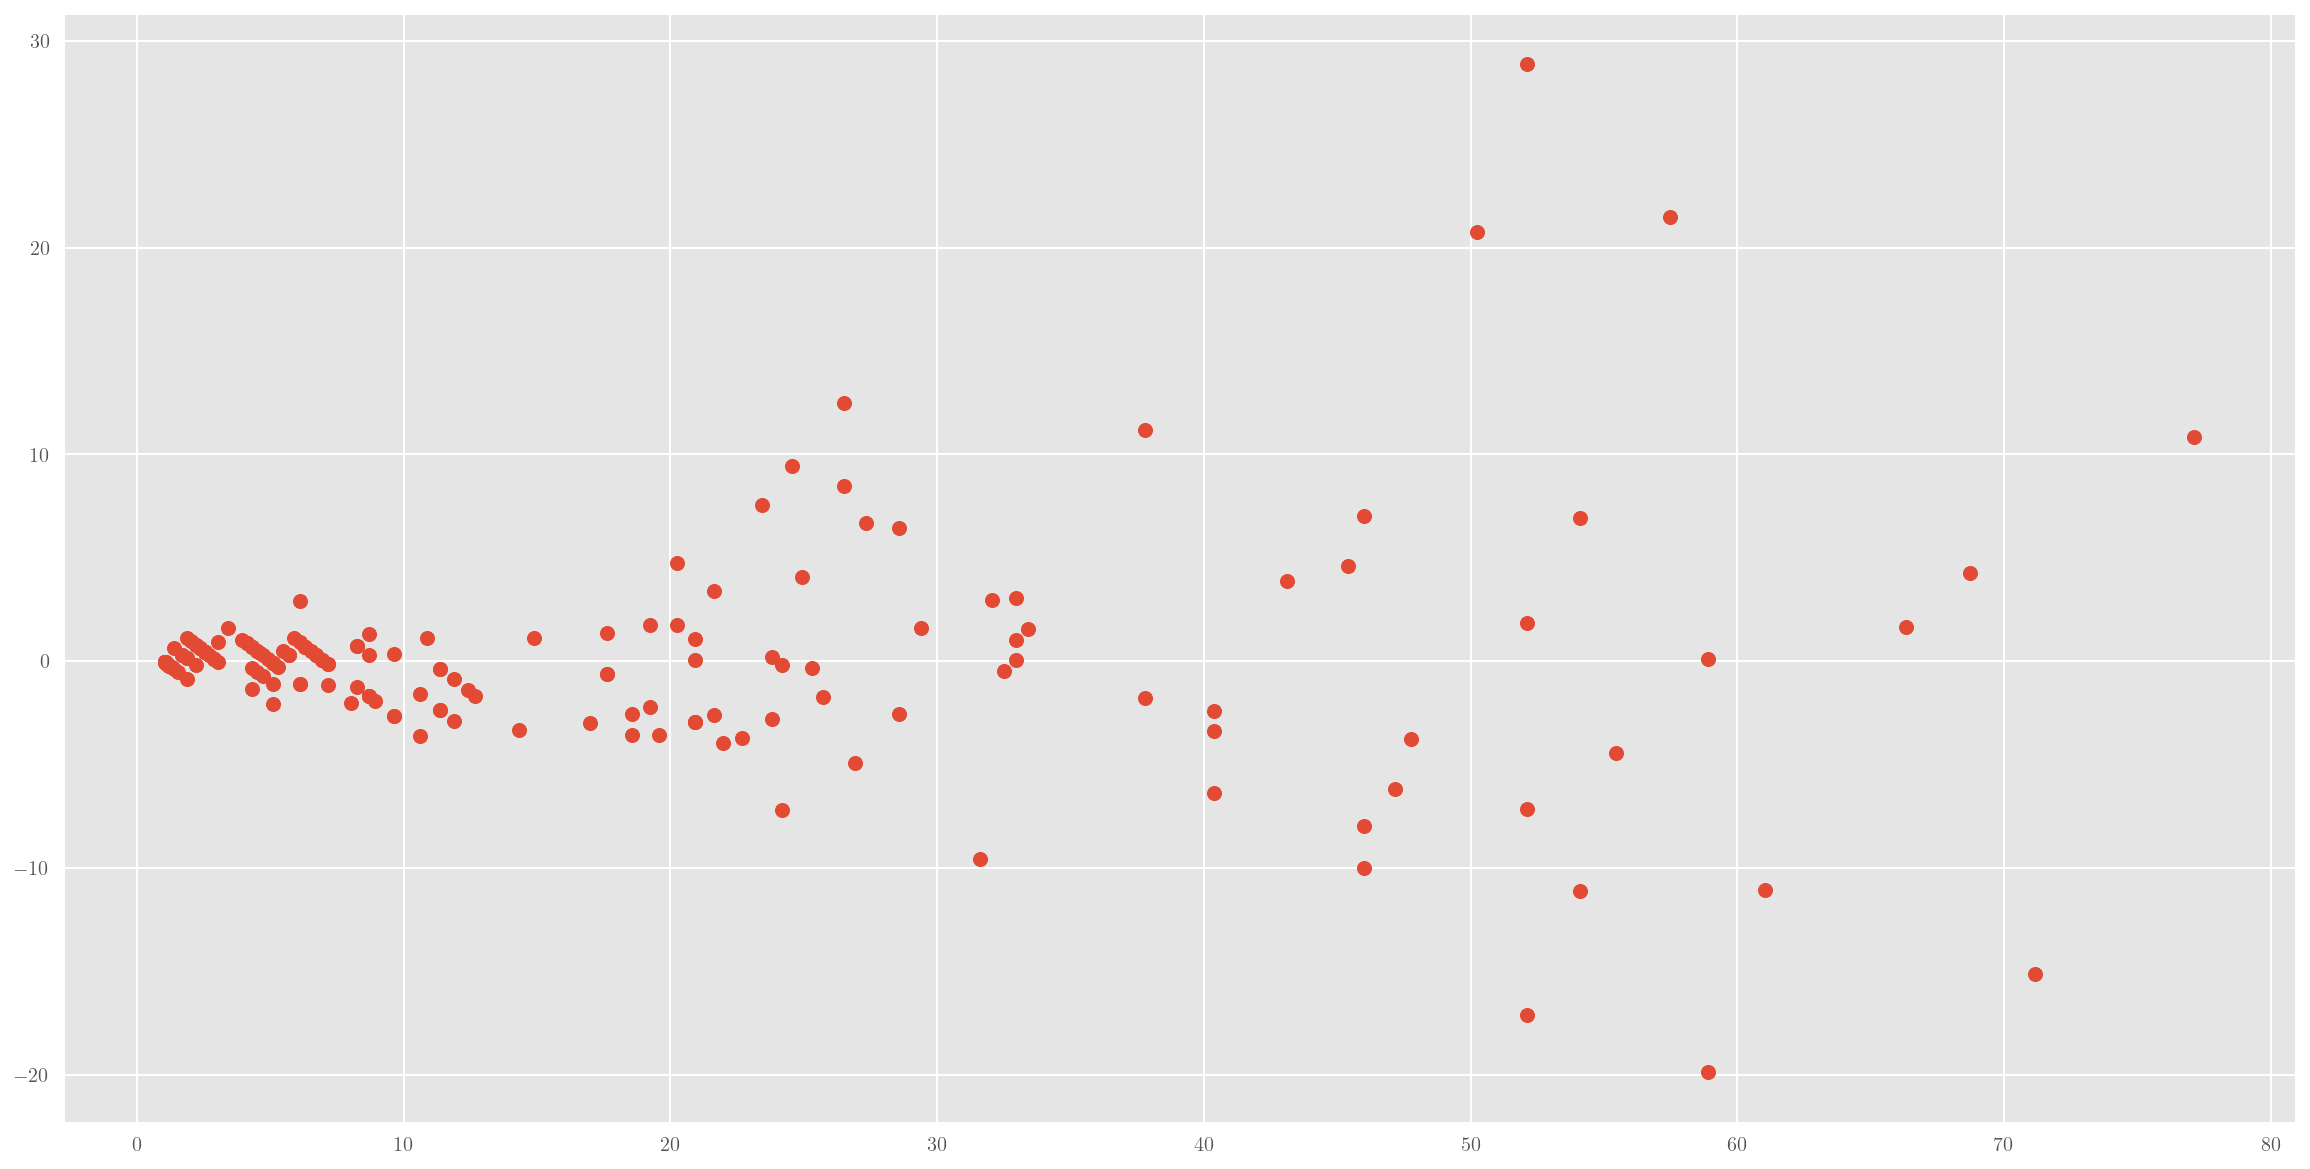

In [22]:
yhat = natural(data[x1], pars[0], pars[1], pars[2])
residual = data[y1] - yhat
plt.scatter(yhat, residual);


## Observation

The residuals appear to be symmetrically distributed , which shows that the comapred to the linear model, the non linear model has a low bias error. However the heteroscedasticity remain to be addressed.  

In [23]:
data['area'] = np.power(data.petiole, 2)

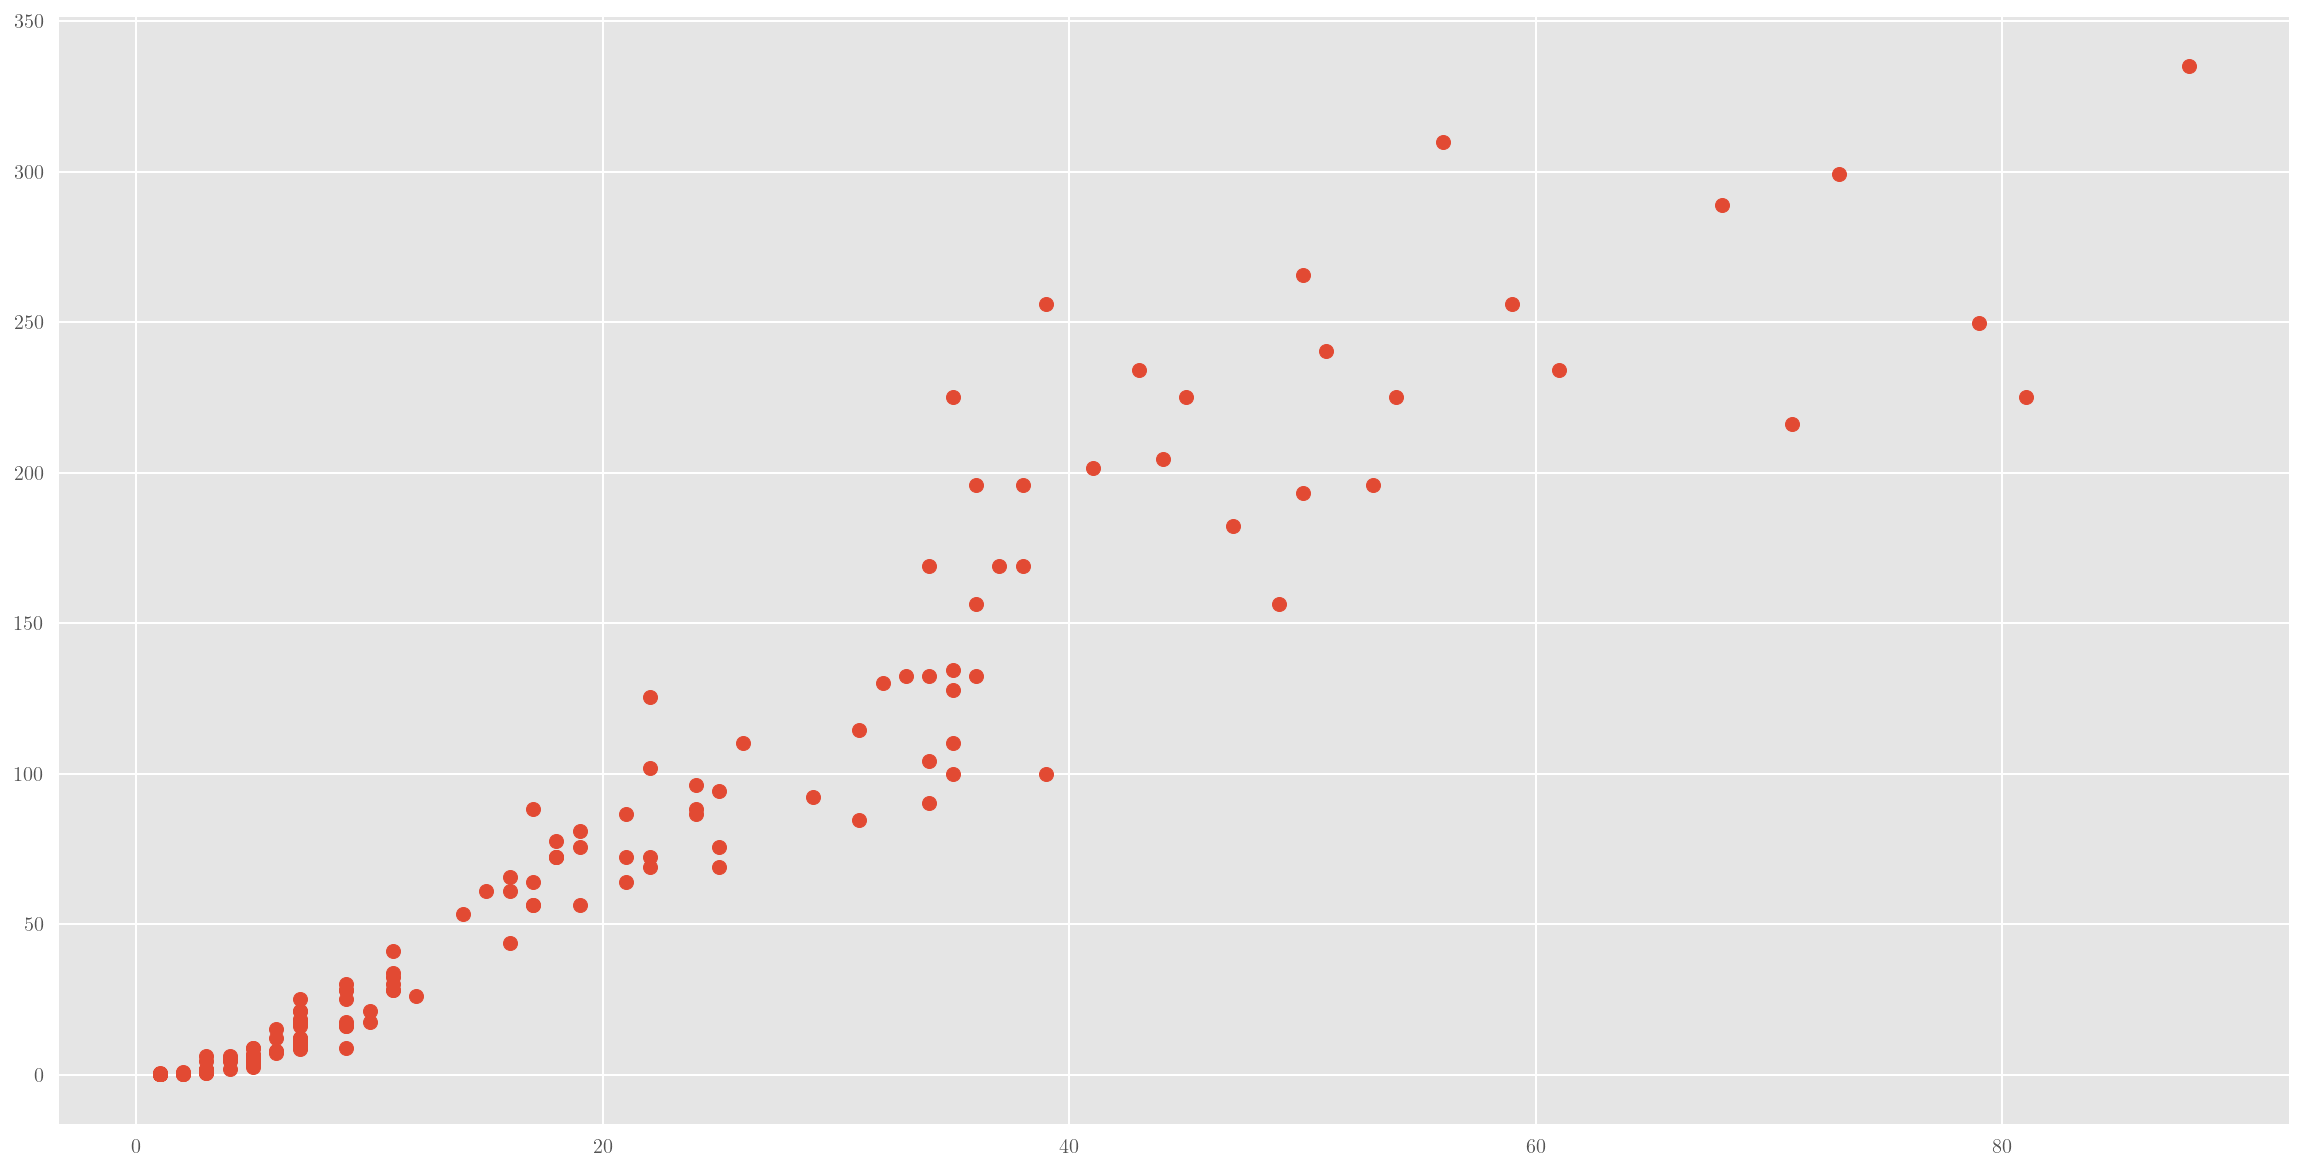

In [24]:
plt.scatter(data['leaflet count'], data.area)

In [25]:
data.describe(include='all')

petiole  leaflet count        area
count  209.000000     209.000000  209.000000
mean     5.340431      15.071770   53.176447
std      4.977428      17.935237   77.705770
min      0.200000       1.000000    0.040000
25%      1.100000       3.000000    1.210000
50%      3.300000       7.000000   10.890000
75%      8.800000      22.000000   77.440000
max     18.300000      88.000000  334.890000

In [26]:
model = LinearRegression();
X, y = data[['area']], data['leaflet count']

In [27]:
model.fit(X, y)
yhat = model.predict(X)

In [28]:

print("Mean Squared Error: %.2f"
      % mean_squared_error(y, yhat))
r2 = r2_score(y, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 23.47
Coefficient of Determination (R^2):0.9266721035213041


In [29]:
data['yhat'] = yhat


In [30]:
data.corr()

petiole  leaflet count      area      yhat
petiole        1.000000       0.941619  0.958998  0.958998
leaflet count  0.941619       1.000000  0.962638  0.962638
area           0.958998       0.962638  1.000000  1.000000
yhat           0.958998       0.962638  1.000000  1.000000